In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("MNIST_Train.csv")

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [6]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2
    

In [12]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y)/ Y.size

def gradient_descent(X,Y,iter,alpha):
    W1,b1,W2,b2 = init_params()
    for i in range(iter):
        Z1,A1,Z2,A2 = forward_prop(W1,b1,W2,b2,X)
        dW1,db1,dW2,db2 = backward_prop(Z1,A1,Z2,A2,W1,W2,X,Y)
        W1,b1,W2,b2 = update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
        if i%10==0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2),Y))
    return W1,b1,W2,b2

In [14]:
W1, b1, W2, b2 = gradient_descent(X_train,Y_train,500,0.1)

Iteration:  0
[3 0 1 ... 1 4 1] [5 9 2 ... 6 6 8]
Accuracy:  0.08680487804878048
Iteration:  10
[3 2 1 ... 1 2 3] [5 9 2 ... 6 6 8]
Accuracy:  0.1391219512195122
Iteration:  20
[3 2 1 ... 7 7 3] [5 9 2 ... 6 6 8]
Accuracy:  0.20368292682926828
Iteration:  30
[3 2 1 ... 7 7 3] [5 9 2 ... 6 6 8]
Accuracy:  0.2547317073170732
Iteration:  40
[3 2 1 ... 7 7 3] [5 9 2 ... 6 6 8]
Accuracy:  0.2905853658536585
Iteration:  50
[3 2 2 ... 4 2 3] [5 9 2 ... 6 6 8]
Accuracy:  0.32041463414634147
Iteration:  60
[3 8 2 ... 4 2 3] [5 9 2 ... 6 6 8]
Accuracy:  0.34729268292682924
Iteration:  70
[3 8 8 ... 0 4 3] [5 9 2 ... 6 6 8]
Accuracy:  0.3881951219512195
Iteration:  80
[3 8 8 ... 6 4 3] [5 9 2 ... 6 6 8]
Accuracy:  0.45102439024390245
Iteration:  90
[3 8 8 ... 6 6 3] [5 9 2 ... 6 6 8]
Accuracy:  0.4986829268292683
Iteration:  100
[3 9 8 ... 6 6 3] [5 9 2 ... 6 6 8]
Accuracy:  0.534
Iteration:  110
[3 9 2 ... 6 6 3] [5 9 2 ... 6 6 8]
Accuracy:  0.5639268292682926
Iteration:  120
[3 9 2 ... 6 6 3] [

In [21]:
#this will return all the predictions for given dataset X
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

#make prediction on a specific image, get actual and compare the two
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(current_image, W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    #turn row of size 784 into 28x28 picture and show with matplotlib
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  5


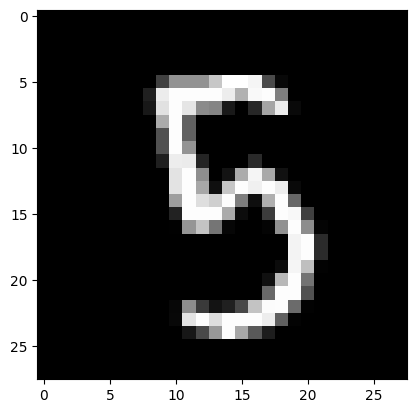

Prediction:  [9]
Label:  9


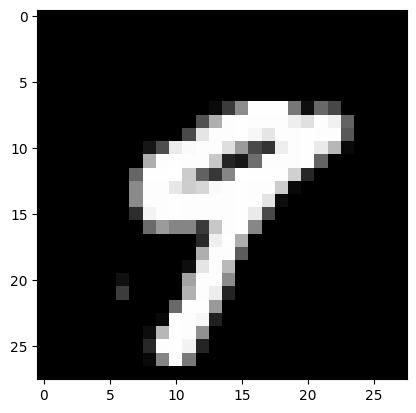

Prediction:  [2]
Label:  2


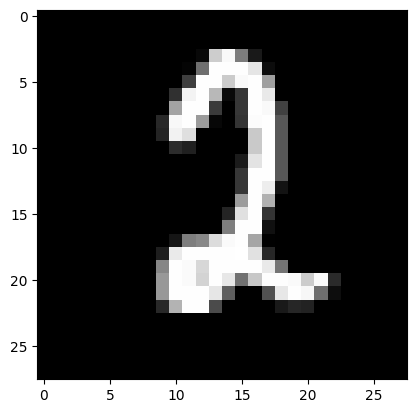

Prediction:  [2]
Label:  2


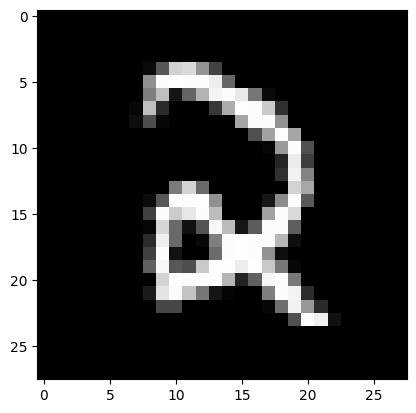

In [22]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [23]:
#now lets test this on test data:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[0 8 7 9 7 1 7 5 1 1 4 9 4 9 0 7 6 9 6 5 9 0 2 8 2 9 4 8 1 2 2 7 4 7 9 9 8
 5 6 5 0 0 8 7 1 7 8 1 8 0 3 1 0 5 5 6 2 6 8 1 2 4 3 0 2 5 1 6 7 8 3 7 7 5
 2 0 7 7 4 0 2 8 5 4 7 9 5 3 0 3 9 5 1 8 6 0 6 3 6 5 1 9 9 0 1 4 1 3 2 6 0
 9 9 6 7 6 7 5 3 5 1 4 4 3 2 3 4 1 9 1 5 1 1 5 7 5 9 2 7 9 2 7 6 7 1 0 5 4
 6 2 1 6 2 9 9 5 3 0 4 5 4 7 9 3 6 1 0 4 5 2 1 3 9 6 0 7 0 5 2 2 5 2 7 5 0
 1 7 7 8 1 6 7 5 7 7 1 0 0 8 5 7 7 0 9 6 7 7 1 8 0 1 0 4 2 1 5 9 4 6 1 6 9
 9 6 9 0 3 5 6 8 8 3 1 3 4 7 3 8 8 7 9 9 4 7 6 4 5 4 0 3 9 0 6 5 8 1 7 6 3
 0 7 0 1 9 7 8 7 9 6 7 8 6 6 5 5 3 8 4 1 5 2 2 4 5 8 4 3 7 3 6 3 3 3 3 6 1
 7 9 0 5 9 7 6 2 5 6 9 7 0 8 6 8 0 9 9 1 9 7 3 9 0 4 8 3 4 5 3 9 8 7 5 1 4
 2 1 9 1 9 6 6 6 2 9 5 4 0 0 4 8 7 7 9 7 2 2 7 6 6 1 4 2 7 0 1 5 9 8 5 4 0
 5 1 6 3 8 0 2 0 7 1 8 3 3 0 8 7 0 9 1 2 9 2 6 1 4 1 3 5 4 7 5 8 5 5 0 2 2
 0 5 1 0 3 3 0 2 7 6 4 2 3 3 2 4 1 7 1 9 4 3 1 1 3 4 9 2 5 9 9 7 0 6 6 7 9
 1 1 3 1 1 6 3 3 3 8 4 0 4 0 3 7 4 3 7 1 3 4 7 9 5 7 1 0 8 7 2 9 9 4 8 7 1
 3 0 4 8 3 9 1 8 0 1 1 6 

0.819